In [62]:
import numpy as np
import scipy.optimize
import control
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import math
import PIL.Image

import sympy
plt.style.use('dark_background')

In [ ]:


a = 

In [40]:
Vfs = np.logspace(-2, 4, 20)[:,np.newaxis] # rad/s
tfs = np.logspace(-2, 0, 21)[np.newaxis,:] # rad/s^2
P = np.logspace(0.5, 3) # W

<ipython-input-82-1c4afe9fa75f>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tfs, Vfs, (dzdv3 / np.mean(dzdv3, axis=0))) # , np.log(dzdv3)


Text(0, 0.5, 'Vf')

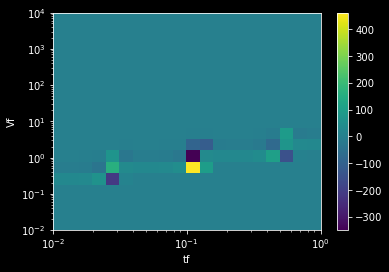

In [82]:
P0 = 50
# 1 / Itot * (Vfs * (tfs - Vfs**2 / P0 * (1 - np.exp(-tfs * P0 / Vfs**2)))) + v0 * tfs + z0
dzdv1 = ( \
    (tfs - Vfs**2 / P0 * (1 - np.exp(-tfs * P0 / Vfs**2))) \
    + Vfs * ( \
        2 * Vfs / P0 * (1 - np.exp(-tfs * P0 / Vfs**2)) \
        + Vfs**2 / P0 * (((-2) * -tfs * P0 / Vfs**3) * np.exp(-tfs * P0 / Vfs**2)) \
    )) # 1 / I * 
dzdv2 = 3 * Vfs**2 / P0 / Itot * np.exp(-tfs * P0 / Vfs**2) + (-tfs * P0 * (-2) / Vfs**3) * Vfs**3 / P0 / Itot * np.exp(-tfs * P0 / Vfs**2) \
   + 3 * Vfs**2 / P0 / Itot \
   + tfs / Itot

# 1 / Itot * (T0 * (-T0 / Vfs) ** 2 * np.exp(-tfs * (T0 / Vfs))) + v0 * tfs + z0

T0 = P0 / Vfs / 4
dT0_dv = -P0 / Vfs**2 / 4
tc = T0 / Vfs
dtc_dv = -2 * P0 / Vfs**3 / 4

dzdv3 = 1 / Itot * (\
    dT0_dv * tc**2 + \
    T0 * dtc_dv * (2 * tc) + \
    T0 * tc**2 * (-tfs) * dtc_dv \
                   ) * np.exp(-tfs * tc) \

'''np.exp(-tfs * P0 / Vfs**2) * (3 * Vfs**2 / P0 - 2 * tfs) \
           + 3 * Vfs**2 / P0 \
           + tfs # the first bracketed term is monotonic in Vf, but not the second which degrades with larger Vf (due to the exponential term).'''

# plt.imshow(np.log(dzdv), extent=[np.amin(Vfs), np.amax(Vfs), np.amin(tfs), np.amax(tfs)], aspect='auto', origin='lower')
plt.pcolormesh(tfs, Vfs, (dzdv3 / np.mean(dzdv3, axis=0))) # , np.log(dzdv3)
plt.xscale('log')
plt.yscale('log')
# plt.cscale('log')
plt.colorbar()
plt.xlabel('tf')
plt.ylabel('Vf')

<ipython-input-80-36d460c311b7>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tfs, Vfs, (z / np.mean(z, axis=0)))
<ipython-input-80-36d460c311b7>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tfs, Vfs, (zb / np.mean(zb, axis=0)))
<ipython-input-80-36d460c311b7>:36: RuntimeWarning: invalid value encountered in log
  plt.pcolormesh(tfs, Vfs, np.log(zb))
<ipython-input-80-36d460c311b7>:36: MatplotlibDeprecationWarning: shad

Text(0, 0.5, 'Vf')

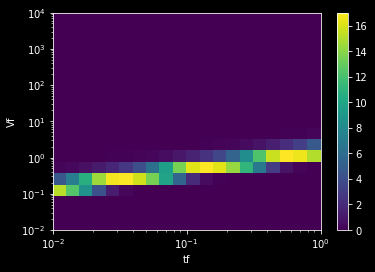

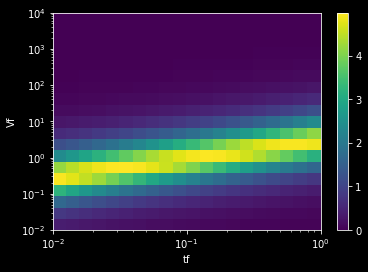

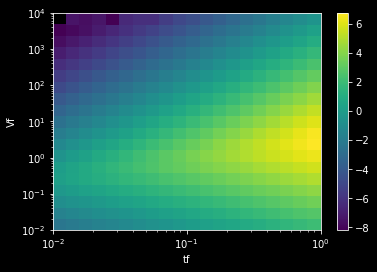

In [80]:
P0 = 10
Itot = 0.001
v0 = 0 # -20
z0 = 0

T0 = P0 / Vfs / 4

za = Vfs ** 3 / P0 / Itot * np.exp(-tfs * P0 / Vfs ** 2) \
    + (Vfs / Itot + v0) * tfs \
    + (z0 - Vfs ** 3 / P0 / Itot)
zb = 1 / Itot * (Vfs * (tfs - Vfs**2 / P0 * (1 - np.exp(-tfs * P0 / Vfs**2)))) + v0 * tfs + z0

z = 1 / Itot * (T0 * (-T0 / Vfs) ** 2 * np.exp(-tfs * (T0 / Vfs))) + v0 * tfs + z0
v = 1 / Itot * (T0 * (-T0 / Vfs) * np.exp(-tfs * (T0 / Vfs))) + v0
a = 1 / Itot * (T0 * np.exp(-tfs * (T0 / Vfs)))

plt.figure(0)
plt.pcolormesh(tfs, Vfs, (z / np.mean(z, axis=0)))
plt.xscale('log')
plt.yscale('log')
# plt.cscale('log')
plt.colorbar()
plt.xlabel('tf')
plt.ylabel('Vf')

plt.figure(2)
plt.pcolormesh(tfs, Vfs, (zb / np.mean(zb, axis=0)))
plt.xscale('log')
plt.yscale('log')
# plt.cscale('log')
plt.colorbar()
plt.xlabel('tf')
plt.ylabel('Vf')

plt.figure(1)
plt.pcolormesh(tfs, Vfs, np.log(zb))
plt.xscale('log')
plt.yscale('log')
# plt.cscale('log')
plt.colorbar()
plt.xlabel('tf')
plt.ylabel('Vf')